<h2> FIRST MOVED LABLES FILES INTO A SEPARATE FOLDER</h2>

In [13]:
import shutil
import os
    
source_dir = 'D:/SARAS/mesad-real/mesad-real/train/annotations'
target_dir = 'D:/SARAS/mesad-real/mesad-real/train/labels'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    if (file_name.find('labels') != -1):
        shutil.move(os.path.join(source_dir, file_name), target_dir)

"for file_name in file_names:\n    if (file_name.find('labels') != -1):\n        shutil.move(os.path.join(source_dir, file_name), target_dir)"

<h2> TESTING </h2>

  0%|          | 0/5 [00:00<?, ?it/s]C:\Miniconda3\lib\site-packages\imgaug\imgaug.py:2120: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("imgaug.imshow(%s)" % (image.shape,))


CuttingTissue 257 286 559 528


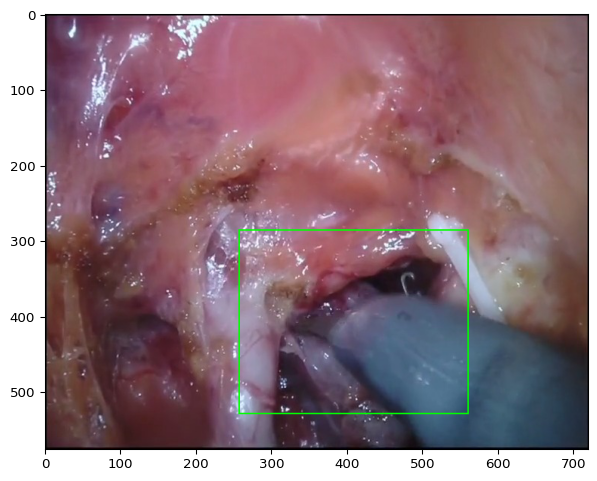

 20%|██        | 1/5 [00:00<00:01,  3.27it/s]

CuttingTissue 302 166 604 409


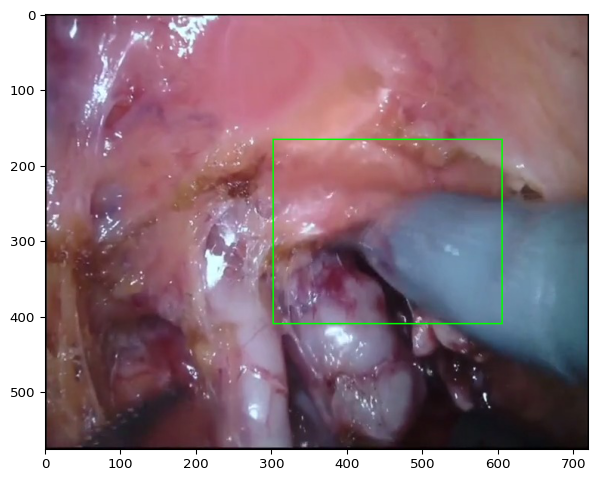

 40%|████      | 2/5 [00:00<00:00,  3.60it/s]

PullingSeminalVesicle 171 386 476 556


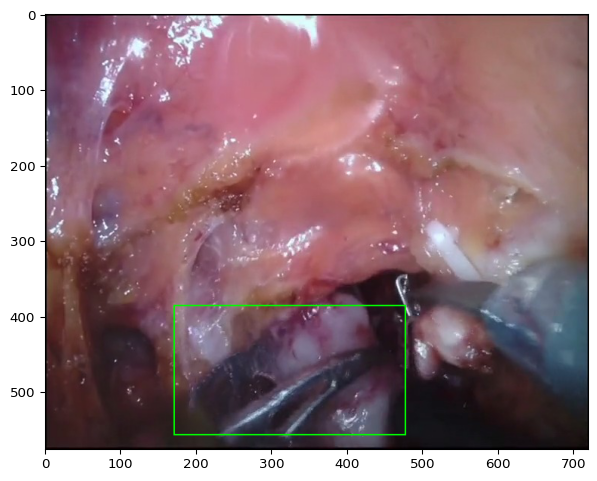

CuttingSeminalVesicle 400 257 630 460


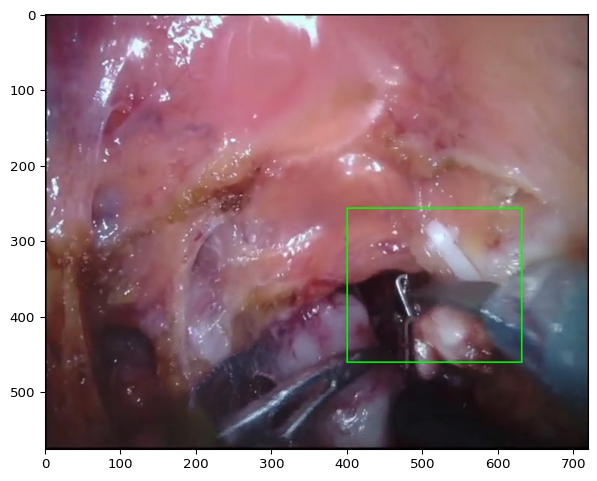

 60%|██████    | 3/5 [00:01<00:00,  2.41it/s]

CuttingSeminalVesicle 247 300 477 504


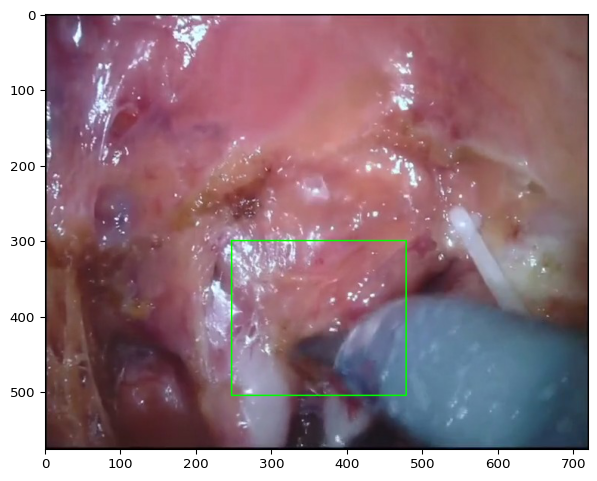

 80%|████████  | 4/5 [00:01<00:00,  2.83it/s]

CuttingSeminalVesicle 247 300 477 504


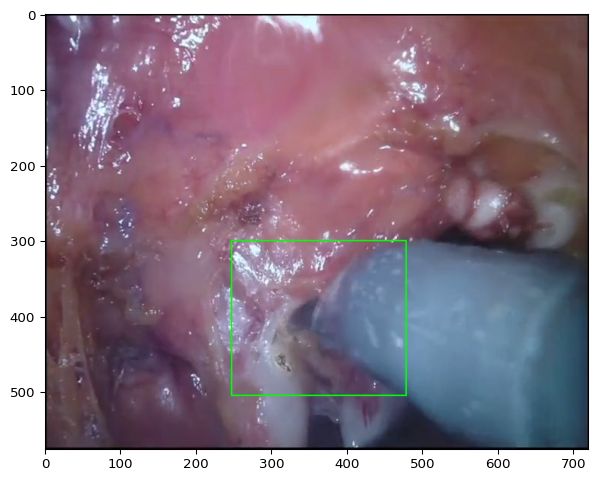

100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


In [87]:
import shutil
import os
import csv
from PIL import Image

# THESE ARE FOR IMAGE AND BOUNDING BOXES
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Currently Each Image has a corresponding TSV file for bounding boxes annotations and a TSV file for labels of the bboxes
# We have to get labels, bbox coordinates and convert them to YOLO format and save as txt using the same name as the image file

# PROVIDING PATHS
annotation_dir = 'D:/SARAS/mesad-real/mesad-real/train/annotations' # Contains '.bboxes' TSV Files
labels_dir =  'D:/SARAS/mesad-real/mesad-real/train/labels'         # Contains '.bboxes.labels' TSV Files
image_dir = 'D:/SARAS/mesad-real/mesad-real/train/images'           # Contains images
target_dir = 'D:/SARAS/mesad-real/mesad-real/train/yoloformat'      # Where we save converted txts

# TAKING ALL FLIES IN LISTS
annotations = os.listdir(annotation_dir)
labels = os.listdir(labels_dir)
images = os.listdir(image_dir)


# CHECKING IF THEY HAVE SAME NUMBER OF DATA
#print(len(annotations))
#print(len(labels))
#print(len(images))

# CHECKING ACCESS
#print("Accessing Annotation " +annotations[-1])
#print("Accessing Annotation " +labels[-1])
#print("Accessing Annotation " +images[-1])

# DISPLAY IMAGE/ACCESS FILES USING PATH + FILENAME
'''path = image_dir +'/'+str(images[0])
im = Image.open(path)
display(im)
print(images[0])'''

from tqdm import tqdm
for i in tqdm(range(5)):
    

    # OPENING LABELS TSV FOR LABELS
    label_tsv_path = labels_dir + '/' +str(labels[i])
    tsv_flie = open(label_tsv_path)
    read_label_tsv = csv.reader(tsv_flie, delimiter="\t")

    #OPENING BBXO TSV FOR BBOX
    bbox_tsv_path = annotation_dir + '/' +str(annotations[i])
    tsv_flie1 = open(bbox_tsv_path)
    read_bbox_tsv = csv.reader(tsv_flie1, delimiter="\t")



    # THIS LOOP RUNS ON THE NUMBER OF ANNOTATIONS AVAILABLE FOR EACH FILE
    for rowLabel, rowBbox in zip(read_label_tsv ,read_bbox_tsv):
        label = rowLabel[0]
        vx1 = rowBbox[0]
        vy1 = rowBbox[1]
        vx2 = rowBbox[2]
        vy2 = rowBbox[3]
        print( label + ' ' + vx1 + ' ' + vy1 + ' ' + vx2 + ' ' + vy2)

        

        # OPENING AND TESTING ORIGINAL BOUNDING BOX

        vx1 = int(vx1)
        vx2 = int(vx2)
        vy1 = int(vy1)
        vy2 = int(vy2)
        image_path = image_dir + '/' + str(images[i])
        image = imageio.imread(image_path)
        bbs =  BoundingBoxesOnImage([BoundingBox(x1=vx1, x2=vx2, y1=vy1, y2=vy2)], shape=image.shape)
        ia.imshow(bbs.draw_on_image(image,size=2))



    





<h2> GETIING THE LIST OF LABELS AND DICTIONARY <h2>

In [71]:
# GETTING ALL LABELS
allLabels = []

for i in tqdm(range(len(labels))):
    label_tsv_path = labels_dir + '/' +str(labels[i])
    tsv_flie = open(label_tsv_path)
    read_label_tsv = csv.reader(tsv_flie, delimiter="\t")

    for rowLabel in read_label_tsv:
        label = rowLabel[0]
        allLabels.append(label)

    tsv_flie.close()

print("Length of " +str(len(allLabels)))

# TAKING A SET FOR UNIQUE ITEMS ONLY
labelSet = set(allLabels)
print("Total Labels: " +str(len(labelSet))) # IF 21 THEN ALL IS WELL
print(labelSet)


100%|██████████| 23366/23366 [00:02<00:00, 8154.28it/s]

Length of 35124
Total Labels: 21
{'CuttingThread', 'PullingVasDeferens', 'PullingSeminalVesicle', 'CuttingSeminalVesicle', 'ClippingBladderNeck', 'SuckingSmoke', 'SuckingBlood', 'PullingProstate', 'CuttingProstate', 'BaggingProstate', 'CuttingTissue', 'BladderNeckDissection', 'ClippingSeminalVesicle', 'ClippingVasDeferens', 'CuttingMesocolon', 'CuttingVasDeferens', 'PullingTissue', 'BladderAnastomosis', 'ClippingTissue', 'PullingBladderNeck', 'UrethraDissection'}


In [81]:
# CONSTRUCT DICTIONARY
labelDictionary = { 'CuttingThread'         : 0, 
                    'PullingVasDeferens'    : 1, 
                    'PullingSeminalVesicle' : 2, 
                    'CuttingSeminalVesicle' : 3, 
                    'ClippingBladderNeck'   : 4, 
                    'SuckingSmoke'          : 5, 
                    'SuckingBlood'          : 6, 
                    'PullingProstate'       : 7, 
                    'CuttingProstate'       : 8, 
                    'BaggingProstate'       : 9, 
                    'CuttingTissue'         : 10, 
                    'BladderNeckDissection' : 11, 
                    'ClippingSeminalVesicle': 12, 
                    'ClippingVasDeferens'   : 13, 
                    'CuttingMesocolon'      : 14, 
                    'CuttingVasDeferens'    : 15, 
                    'PullingTissue'         : 16, 
                    'BladderAnastomosis'    : 17, 
                    'ClippingTissue'        : 18, 
                    'PullingBladderNeck'    : 19, 
                    'UrethraDissection'     : 20
                    }

print(len(labelDictionary))
print(labelDictionary[ 'ClippingBladderNeck' ])

21
4


<h2> FINAL </h2>

In [114]:
import shutil
import os
import csv
from PIL import Image
import cv2

# THESE ARE FOR IMAGE AND BOUNDING BOXES
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Currently Each Image has a corresponding TSV file for bounding boxes annotations and a TSV file for labels of the bboxes
# We have to get labels, bbox coordinates and convert them to YOLO format and save as txt using the same name as the image file
# We also have a label dictionary

# PROVIDING PATHS
annotation_dir = 'D:/SARAS/mesad-real/mesad-real/train/annotations' # Contains '.bboxes' TSV Files
labels_dir =  'D:/SARAS/mesad-real/mesad-real/train/labels'         # Contains '.bboxes.labels' TSV Files
image_dir = 'D:/SARAS/mesad-real/mesad-real/train/images'           # Contains images
target_dir = 'D:/SARAS/mesad-real/mesad-real/train/yoloformat'      # Where we save converted txts

# TAKING ALL FLIES IN LISTS
annotations = os.listdir(annotation_dir)
labels = os.listdir(labels_dir)
images = os.listdir(image_dir)

# THE CLASS NAME TO NUMERICAL DICTIONARY
labelDictionary = { 'CuttingThread'         : 0, 
                    'PullingVasDeferens'    : 1, 
                    'PullingSeminalVesicle' : 2, 
                    'CuttingSeminalVesicle' : 3, 
                    'ClippingBladderNeck'   : 4, 
                    'SuckingSmoke'          : 5, 
                    'SuckingBlood'          : 6, 
                    'PullingProstate'       : 7, 
                    'CuttingProstate'       : 8, 
                    'BaggingProstate'       : 9, 
                    'CuttingTissue'         : 10, 
                    'BladderNeckDissection' : 11, 
                    'ClippingSeminalVesicle': 12, 
                    'ClippingVasDeferens'   : 13, 
                    'CuttingMesocolon'      : 14, 
                    'CuttingVasDeferens'    : 15, 
                    'PullingTissue'         : 16, 
                    'BladderAnastomosis'    : 17, 
                    'ClippingTissue'        : 18, 
                    'PullingBladderNeck'    : 19, 
                    'UrethraDissection'     : 20
                    }



# ITERATE OVER ALL THE FILES
from tqdm import tqdm
for i in tqdm(range(len(labels))):
    

    # OPENING LABELS TSV FOR LABELS
    label_tsv_path = labels_dir + '/' +str(labels[i])
    tsv_flie = open(label_tsv_path)
    read_label_tsv = csv.reader(tsv_flie, delimiter="\t")

    # OPENING BBXO TSV FOR BBOX
    bbox_tsv_path = annotation_dir + '/' +str(annotations[i])
    tsv_flie1 = open(bbox_tsv_path)
    read_bbox_tsv = csv.reader(tsv_flie1, delimiter="\t")

    # GENERATING TXT FILE NAME SAME AS THE IMAGE FILE NAME
    textLabel = images[i]
    textLabel = textLabel[::-1]
    textLabel = textLabel[4:]
    textLabel = textLabel[::-1]
    textLabel = textLabel+'.txt'
    textLabel = target_dir + '/' + textLabel
    

   

    # THIS LOOP RUNS FOR THE NUMBER OF ANNOTATIONS AVAILABLE FOR EACH FILE 
    for rowLabel, rowBbox in zip(read_label_tsv ,read_bbox_tsv): # Reading From Both Files As They Have Same No of Rows
        label = rowLabel[0]
        x1 = int(rowBbox[0])
        y1 = int(rowBbox[1])
        x2 = int(rowBbox[2])
        y2 = int(rowBbox[3])

        xmin = x1
        xmax = x2
        ymin = y1
        ymax = y2

        #print( label + ' ' + str(x1) + ' ' + str(y1) + ' ' + str(x2) + ' ' + str(y2))

        # CONVERT TO YOLO FORMAT

        xcen = float((xmax+xmin)) / 2
        ycen = float((ymin+ymax)) / 2

        w = float((xmax-xmin))
        h = float((ymax-ymin))

        xcen = xcen / 640
        ycen = ycen / 480
        w = w / 640
        h = h / 480

        xcen = str(xcen)
        ycen = str(ycen)
        w = str(w)
        h = str(h)
        yoloClass = str(labelDictionary[label])

        #print( yoloClass + ' ' + xcen + ' ' + ycen + ' ' + w + ' ' + h)

        if os.path.isfile(textLabel):
            with open(textLabel, 'a') as fd:
                fd.write(f'\n{yoloClass + " " +xcen+ " " +ycen+ " " +w+ " " +h}')
        else:
            with open(textLabel, 'x') as fd1:
                fd1.write(yoloClass + " " +xcen+ " " +ycen+ " " +w+ " " +h)
    
    
    tsv_flie.close()
    tsv_flie1.close()





    ## REMEMBER TO CLOSE TSVss



    





100%|██████████| 23366/23366 [01:32<00:00, 252.44it/s]


In [101]:
string = images[0]
string = string[::-1]
string = string[4:]
string = string[::-1]
fname = string+'.jpg'
print(fname)


real1_frame_1000.jpg
